In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
class Perceptron(object):
 def __init__(self, eta=0.01, n_iter=10):
  self.eta = eta
  self.n_iter = n_iter
 def fit(self, X, y):
  self.w_ = np.zeros(1 + X.shape[1])
  self.errors_ = []
  for _ in range(self.n_iter):
   errors = 0
   for xi, target in zip(X, y):
    update = self.eta * (target - self.predict(xi))
    self.w_[1:] += update * xi
    self.w_[0] += update
    errors += int(update != 0.0)
   self.errors_.append(errors)
  return self
 def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
 def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)
  




In [ ]:
import pandas as pd
>>> df = pd.read_csv('IRIS.csv')
>>> df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

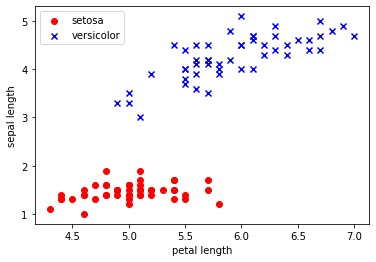

In [ ]:
 import matplotlib.pyplot as plt
 import numpy as np
 y = df.iloc[0:100, 4].values
 y = np.where(y == 'Iris-setosa', -1, 1)
 X = df.iloc[0:100, [0, 2]].values
 plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
 plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
 plt.xlabel('petal length')
 plt.ylabel('sepal length')
 plt.legend(loc='upper left')

 y

In [ ]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
df=pd.DataFrame(mydict)
df.iloc[[0, 1]]

,a,b,c,d
0,1,2,3,4
1,100,200,300,400


In [ ]:
class AdalineGD(object):
  def __init__(self, eta=0.01, n_iter=50):
    self.eta = eta
    self.n_iter = n_iter


  def fit(self, X, y):
   self.w_ = np.zeros(1 + X.shape[1])
   self.errors_ = []
   self.cost_ = []
   for i in range(self.n_iter):
    output = self.net_input(X)
    errors = (y - output)
    self.w_[1:] += self.eta * X.T.dot(errors)
    self.w_[0] += self.eta * errors.sum()
    cost = (errors**2).sum() / 2.0
    self.cost_.append(cost)
   return self
  def net_input(self, X):
   return np.dot(X, self.w_[1:]) + self.w_[0]
  def activation(self, X):
 
   return self.net_input(X)
  def predict(self, X):

   return np.where(self.activation(X) >= 0.0, 1, -1)



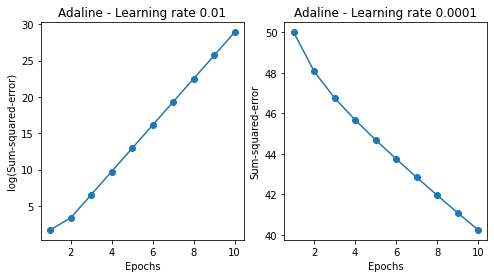

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


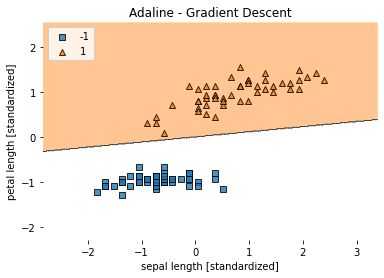

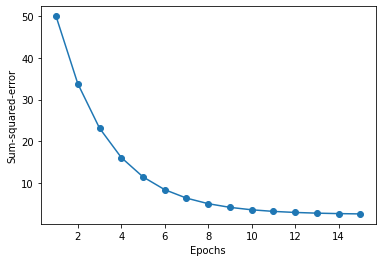

In [ ]:
from mlxtend.plotting import plot_decision_regions
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()